# Armstrong 1994 model

### Multiple P-Z model with a constant N stock

    - dPi/dt = Vi*N/(N+K)*Pi -g*Pi*Zi/Kp- lp*Pi
    - dZi/dt = a*g*Pi*Zi/Kp - lz*Zi
    - N = T - sum(Pi) - sum(Zi)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# coefficients
h = 1 # timestep size
T = 10 # total nutrient level
Ns= 4 # number of size class
inipz = .001 # initial condition for phyto and zoo
# set parameters
Vmax = 1.4 # per day
K = 0.1 # mmol/m3
Kp= 2.8 # mmol/m3
a = 0.4
g = 1.4 # per day
lp = 0.05 # per day
lz = 0.12 # per day
beta = 0.4 # allometric scaling coefficient

In [3]:
def tendency(t,x,Vmax,K,Kp,a,g,lp,lz,Ns,T,beta):
    # initialize arrays
    Ns = int(Ns)
    phy=np.zeros(Ns)
    zoo=np.zeros(Ns)
    out=np.zeros(2*Ns)
    dphydt=np.zeros(Ns)
    dzoodt=np.zeros(Ns)
    #
    for n in range(Ns):
        phy[n]=x[n]
        zoo[n]=x[Ns+n]
    nut = max(0,T - np.sum(phy) - np.sum(zoo))
    for n in range(Ns):
        L = 4**n
        V = Vmax*L**-beta
        dphydt[n] = V*nut/(nut+K)*phy[n] - zoo[n]*g*phy[n]/Kp - lp*phy[n]
        dzoodt[n] = a*zoo[n]*g*phy[n]/Kp - lz*zoo[n]
        out[n]=dphydt[n]
        out[n+Ns]=dzoodt[n]
    return out

In [4]:
# define model_run function
def model_run(trange,xinit,param,dt):
    # expand input
    Vmax = param[0]
    K = param[1]
    Kp= param[2]
    a = param[3]
    g = param[4]
    lp = param[5]
    lz = param[6]
    Ns = param[7]
    T = param[8]
    beta = param[9]
    sol = solve_ivp(tendency,trange,xinit,args=(Vmax,K,Kp,a,g,lp,lz,Ns,T,beta),method='RK45',max_step=dt)
    return sol

In [5]:
# set time range
trange = [0,360*5]
# set parameters
param=np.array([Vmax,K,Kp,a,g,lp,lz,Ns,T,beta])
# set initial conditions
xinit = inipz*np.ones(2*Ns,)
# time step size
h = 1
out = model_run(trange,xinit,param,h)

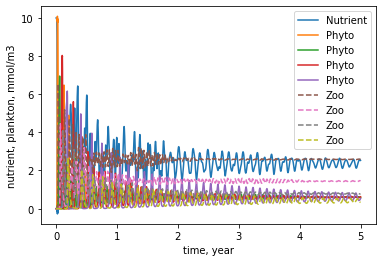

In [6]:
# plot the output
#
t_out = out.t/360
vec_out = out.y
Nt=np.size(t_out)
P=np.zeros((Ns,Nt))
Z=np.zeros((Ns,Nt))
for n in range(Ns):
    P[n,:] = vec_out[n,:]
    Z[n,:] = vec_out[Ns+n,:]
#
N = T - np.sum(P,axis=0) - np.sum(Z,axis=0)
plt.plot(t_out,N,'-',label='Nutrient')
plt.plot(t_out,P.T,'-',label='Phyto')
plt.plot(t_out,Z.T,'--',label='Zoo')
plt.legend()
plt.xlabel('time, year')
plt.ylabel('nutrient, plankton, mmol/m3')
plt.show()

<BarContainer object of 4 artists>

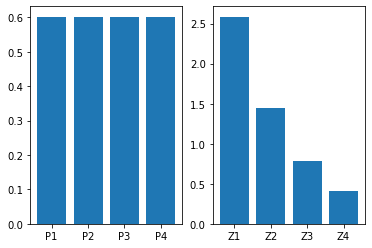

In [7]:
phytos = ["P"+str(x+1) for x in range(Ns)]
zoos = ["Z"+str(x+1) for x in range(Ns)]
# average M last time steps as steady solution
Nave = 200
fig,ax=plt.subplots(1,2)
ax[0].bar(phytos,np.mean(P[:,-Nave:],axis=1))
ax[1].bar(zoos,np.mean(Z[:,-Nave:],axis=1))